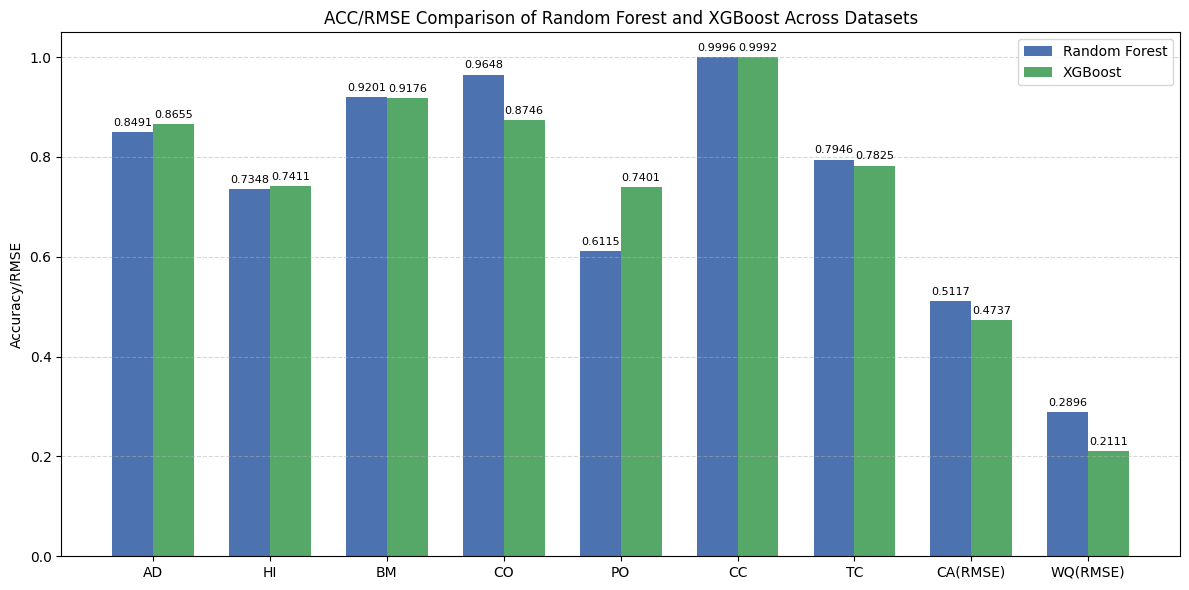

In [1]:
import matplotlib.pyplot as plt
import numpy as np

datasets = [
    "AD", "HI", "BM", "CO", "PO", "CC", "TC", "CA(RMSE)", "WQ(RMSE)"
]

rf_accuracy = [0.8491, 0.7348, 0.9201, 0.9648, 0.6115, 0.9996, 0.7946, 0.5117, 0.2896]
xgb_accuracy = [0.8655, 0.7411, 0.9176, 0.8746, 0.7401, 0.9992, 0.7825, 0.4737, 0.2111]


x = np.arange(len(datasets)) 
width = 0.35 


fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - width/2, rf_accuracy, width, label='Random Forest', color='#4C72B0')
bars2 = ax.bar(x + width/2, xgb_accuracy, width, label='XGBoost', color='#55A868')

ax.set_ylabel('Accuracy/RMSE')
ax.set_title('ACC/RMSE Comparison of Random Forest and XGBoost Across Datasets')
ax.set_xticks(x)
ax.set_xticklabels(datasets)
ax.legend()


for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.4f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


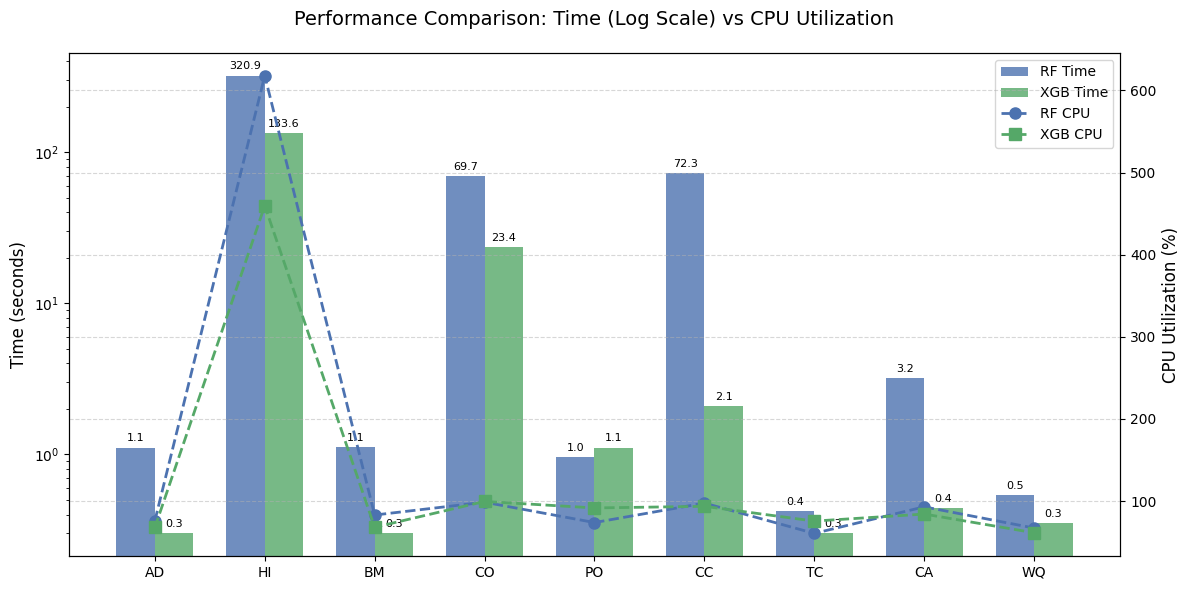

In [2]:
import matplotlib.pyplot as plt
import numpy as np

datasets = ["AD", "HI", "BM", "CO", "PO", "CC", "TC", "CA", "WQ"]
rf_time = [1.11, 320.90, 1.12, 69.66, 0.96, 72.32, 0.42, 3.21, 0.54]
xgb_time = [0.30, 133.57, 0.30, 23.40, 1.11, 2.10, 0.30, 0.44, 0.35]
rf_cpu = [75.91, 617.9, 83.01, 98.63, 73.83, 97.54, 60.65, 92.98, 67.16]
xgb_cpu = [67.83, 459.6, 68.07, 99.55, 91.63, 93.61, 75.6, 84.2, 61.43]

# 创建画布和主坐标轴
fig, ax1 = plt.subplots(figsize=(12, 6))
x = np.arange(len(datasets))
width = 0.35

# 绘制时间柱状图（主坐标轴）
bars_rf_time = ax1.bar(x - width/2, rf_time, width, label='RF Time', color='#4C72B0', alpha=0.8)
bars_xgb_time = ax1.bar(x + width/2, xgb_time, width, label='XGB Time', color='#55A868', alpha=0.8)
ax1.set_ylabel('Time (seconds)', fontsize=12)
ax1.set_yscale('log')  # 对数刻度处理量级差异
ax1.set_xticks(x)
ax1.set_xticklabels(datasets)

# 创建副坐标轴（CPU）
ax2 = ax1.twinx()
line_rf_cpu, = ax2.plot(x, rf_cpu, 'o--', color='#4C72B0', linewidth=2, markersize=8, label='RF CPU')
line_xgb_cpu, = ax2.plot(x, xgb_cpu, 's--', color='#55A868', linewidth=2, markersize=8, label='XGB CPU')
ax2.set_ylabel('CPU Utilization (%)', fontsize=12)

# 合并图例
lines = [bars_rf_time, bars_xgb_time, line_rf_cpu, line_xgb_cpu]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper right')

# 添加数值标签
def add_labels(bars, ax):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.1f}', xy=(bar.get_x() + bar.get_width()/2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=8)

add_labels(bars_rf_time, ax1)
add_labels(bars_xgb_time, ax1)

plt.title('Performance Comparison: Time (Log Scale) vs CPU Utilization', pad=20, fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

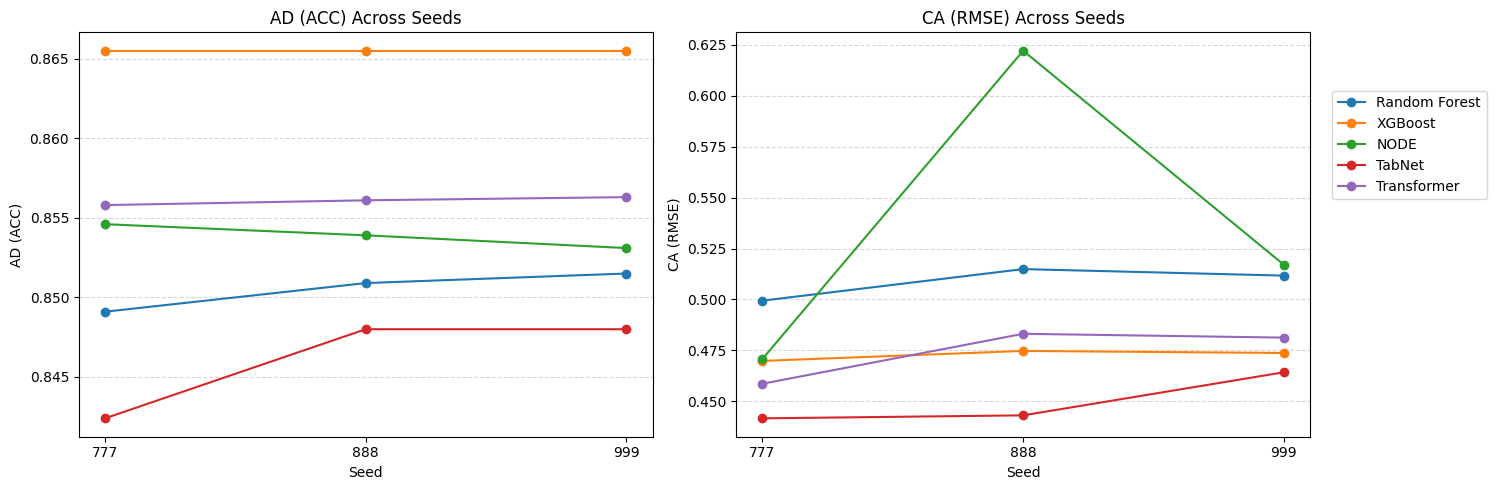

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Seeds used
seeds = [777, 888, 999]

# XGBoost results
xg_ca = [0.4698, 0.4747, 0.4737]  # RMSE
xg_ad = [0.8655, 0.8655, 0.8655]  # ACC

# Random Forest results
rf_ca = [0.4994, 0.5149, 0.5117]  # RMSE
rf_ad = [0.8491, 0.8509, 0.8515]  # ACC

# NODE results (originally MSE -> compute RMSE)
node_ca_mse = [0.2216, 0.3871, 0.2673]
node_ca = [np.sqrt(mse) for mse in node_ca_mse]
node_ad = [0.8546, 0.8539, 0.8531]  # ACC

# TabNet results (originally MSE -> compute RMSE)
tab_ca_mse = [0.1950, 0.1963, 0.2155]
tab_ca = [np.sqrt(mse) for mse in tab_ca_mse]
tab_ad = [0.8424, 0.8480, 0.8480]  # ACC

# Transformer results (originally MSE -> compute RMSE)
tf_ca_mse = [0.2103, 0.2334, 0.2316]
tf_ca = [np.sqrt(mse) for mse in tf_ca_mse]
tf_ad = [0.8558, 0.8561, 0.8563]  # ACC

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# CA (RMSE) plot
axs[1].plot(seeds, rf_ca, marker='o', label='Random Forest')
axs[1].plot(seeds, xg_ca, marker='o', label='XGBoost')
axs[1].plot(seeds, node_ca, marker='o', label='NODE')
axs[1].plot(seeds, tab_ca, marker='o', label='TabNet')
axs[1].plot(seeds, tf_ca, marker='o', label='Transformer')
axs[1].set_title('CA (RMSE) Across Seeds')
axs[1].set_xlabel('Seed')
axs[1].set_ylabel('CA (RMSE)')
axs[1].grid(axis='y', linestyle='--', alpha=0.5)
axs[1].set_xticks(seeds)
axs[1].set_xticklabels(seeds)

# AD (ACC) plot
axs[0].plot(seeds, rf_ad, marker='o')
axs[0].plot(seeds, xg_ad, marker='o')
axs[0].plot(seeds, node_ad, marker='o')
axs[0].plot(seeds, tab_ad, marker='o')
axs[0].plot(seeds, tf_ad, marker='o')
axs[0].set_title('AD (ACC) Across Seeds')
axs[0].set_xlabel('Seed')
axs[0].set_ylabel('AD (ACC)')
#x轴只显示777,888,999
axs[0].set_xticks(seeds)
axs[0].set_xticklabels(seeds)


axs[0].grid(axis='y', linestyle='--', alpha=0.5)

# Move legend outside
fig.legend(loc='center left', bbox_to_anchor=(0.95, 0.7))
plt.tight_layout(rect=[0, 0, 0.95, 1])  # Make room for legend

plt.show()
